# Final Exam (part 2) - Computational Physics I

### Deadline: Friday 13 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name: Rolando Sánchez

## 2. Monte Carlo simulations: Cosmology (10 points) 

Supernovae type Ia (SN Ia) are very energetic astronomical explosions, which have a very similar intrinsic known brightness (i.e. they have a very similar absolute magnitude $M$), so they can be used as cosmological "standard candles" to measure the luminosity distance, $d$, as a function of redshift, $z$:

\begin{equation}
d=\frac{cz}{H_0}
\end{equation}

where $c$ is the speed of light and $H_0$ is the Hubble constant. Since they have similar absolute magnitudes $M$, we can estimate distances by comparing how bright or faint they appear on the sky as indicated by the measured apparent magnitude, $m$, which does differ:

\begin{equation}
m=M+5\log\left(\frac{d}{\rm Mpc}\right)+25
\end{equation}

Higher $m$ values imply objects are fainter; lower $m$ values imply objects are brighter. Same for $M$. Unfortunately, selection effects associated with instrumental limitations can bias our measurements. For example, far-away SN Ia can be so faint that they may not be detectable, so the sample will be biased towards brighter objects. In the equation above $\rm Mpc$ stands for Mega parsecs, which are distance units used in cosmology.

**Therefore, to understand selection bias, we want to simulate this effect using a Monte Carlo simulation.**

The purpose of this problem is to determine the bias as a function of redshift for a sample of objects (SN Ia) via a Monte Carlo calculation. To set up your simulation, assume that:

- $H_0 = 70\,\rm km\,s^{-1}\,Mpc^{-1}$

- the absolute magnitude of SN Ia $M=-19.5\,\rm mag$.

- your supernova search will be able to detect $100$% of objects as faint as $m=18.5\,\rm mag$, and none fainter. 

(a) Write a python function to generate $N$ Gaussian random variables with mean $\langle M\rangle=-19.5\,\rm mag$ and different standard deviations ($\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$).

(b) Make $3$ plots of $M$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M$.

(c) Write a python function to calculate and return:

- the luminosity distances, $d$, in $\rm Mpc$ given redshifts between $z=0$ and $z=0.1$.

- the apparent magnitudes, $m$, for the same redshift range.

(d) Write a python function that:

- reads the resulting $m$ values from item (c),

- removes values with apparent magnitudes larger than the detection threshold $m=18.5\,\rm mag$, 

- re-calculates the mean observed magnitude $\langle M_{\rm observed}\rangle$ of the SN Ia from the actually detected objects for the same redshift range.

- returns the bias as a function of redshift. The bias in $M$ can be calculated with:

\begin{equation}
|\Delta M|=|\langle M_{\rm observed}\rangle  - \langle M\rangle|
\end{equation}

(e) Make $3$ plots of $m$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$, showing the detection threshold and colouring distinctly the objects that would not be detected.

(f) Make $3$ plots of $|\Delta M|$ versus $z$, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$.

(g) Based on your results, at which redshift does selection bias become important in each case?

### Solution

In [1]:
# Importing necessary libraries
import os
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import image
import scienceplots # Just for aesthetic purposes
import scipy.constants as cte #To get physical constants
import matplotlib.patches as patches

In [2]:
# Let's use an specific style for the plots
plt.style.use(["science","notebook","grid"])
# Set the font size globally
plt.rcParams.update({
    "font.size": 10,        # Controls default text size
    "axes.titlesize": 12,   # Controls title size
    "axes.labelsize": 11,   # Controls x and y labels size
    "xtick.labelsize": 11,  # Controls x-tick labels size
    "ytick.labelsize": 11,  # Controls y-tick labels size
    "legend.fontsize": 11   # Controls legend font size
})

(a) Write a python function to generate $N$ Gaussian random variables with mean $\langle M\rangle=-19.5\,\rm mag$ and different standard deviations ($\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$).

In [3]:
# First, let's define our assumptions (CONSTANTS)
H_0 = 70 #km s^-1 Mpc^-1
M = -19.5 #mag

In [4]:
# Let's use np.random.normal() to generate Gaussian random data
def rand_generator(n, mean, sigma):
    """
    This function generates Gaussian (normally distributed) random data based on the specified 
    number of samples, mean, and standard deviation.

    Input:
        n (int) -> Number of random samples to generate.
        mean (float) -> Mean of the Gaussian distribution.
        sigma (float) -> Standard deviation (σ_M) of the Gaussian distribution.

    Output:
        random_data (np.array of floats) -> An array of `n` random samples drawn from the specified 
                                        Gaussian distribution.

    Author: R.S.S.G
    Date created: 10/12/2024
    """
    random_data = np.random.normal(mean, sigma, n) 
    return random_data

In [5]:
# Let's define the sigmas
sigma_M1 = 0.1
sigma_M2 = 0.2
sigma_M3 = 0.5

(b) Make $3$ plots of $M$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M$.

In [6]:
# Calling our function
n = 10000
data_M1 = rand_generator(n, M, sigma_M1)
data_M2 = rand_generator(n, M, sigma_M2)
data_M3 = rand_generator(n, M, sigma_M3)

# For the plot, we need to create an array of n's
n_array = np.ones(data_M1.shape)*n

Let's make scatter plots

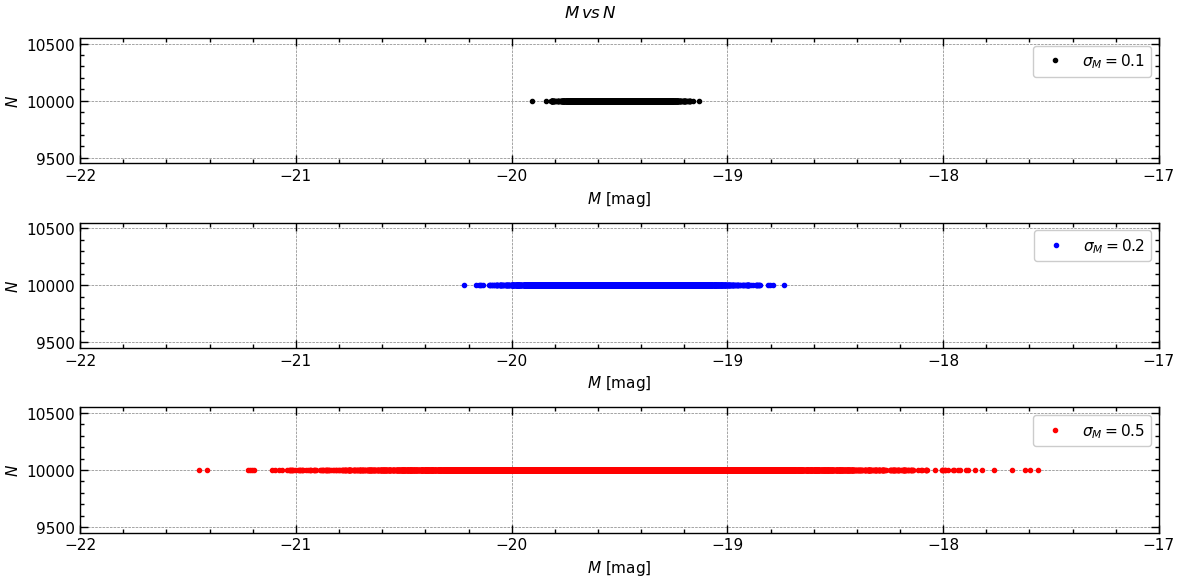

In [7]:
plt.figure(figsize=(12,6))
plt.suptitle(r"$M \, vs \, N $")

plt.subplot(3, 1, 1)
plt.plot(data_M1, n_array, color = "k", label = r"$\sigma_M = 0.1$", linestyle = " ", marker = ".")
plt.xlabel(r"$M$ [mag]")
plt.ylabel(r"$N$")
plt.legend(loc="upper right", ncol = 1)
plt.xlim(-22,-17)

plt.subplot(3, 1, 2)
plt.plot(data_M2, n_array, color = "b", label = r"$\sigma_M = 0.2$", linestyle = " ", marker = ".")
plt.xlabel(r"$M$ [mag]")
plt.ylabel(r"$N$")
plt.legend(loc="upper right", ncol = 1)
plt.xlim(-22,-17)

plt.subplot(3, 1, 3)
plt.plot(data_M3, n_array, color = "r", label = r"$\sigma_M = 0.5$", linestyle = " ", marker = ".")
plt.xlabel(r"$M$ [mag]")
plt.ylabel(r"$N$")
plt.legend(loc="upper right", ncol = 1)
plt.xlim(-22,-17)

plt.tight_layout()
plt.show()
plt.close()

And also, histogram to see the distributions

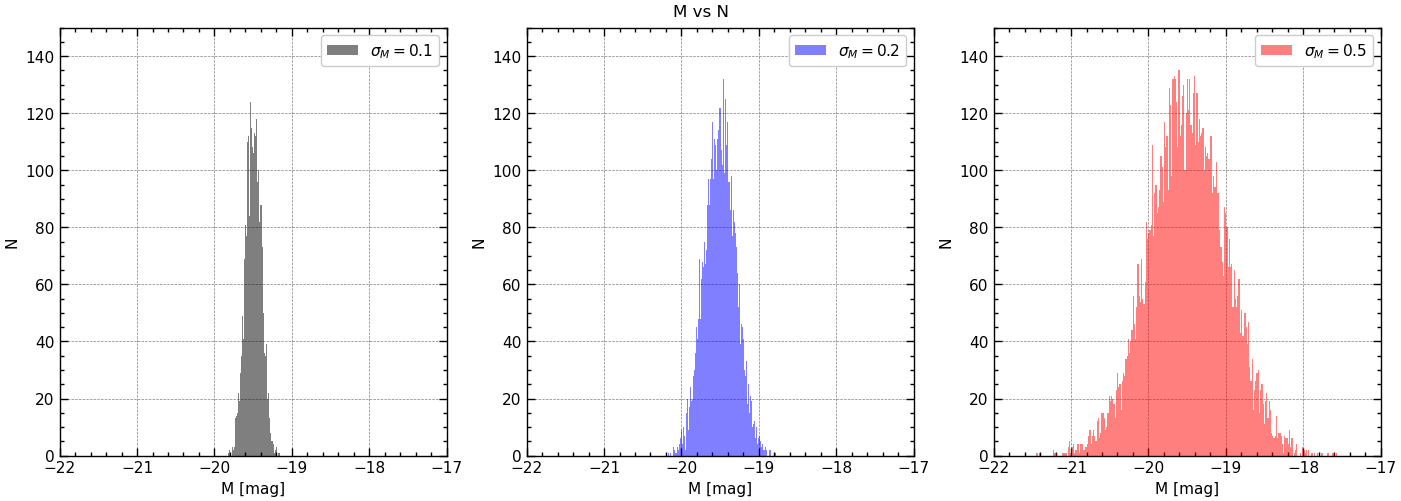

In [8]:
# Density histograms
fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)

fig.suptitle("M vs N")

count_M1, bins_M1, patches_M1 = axes[0].hist(
    data_M1, bins=250, alpha=0.5, label=r"$\sigma_M = 0.1$", color="k"
)
axes[0].set_xlabel("M [mag]")
axes[0].set_ylabel("N")
axes[0].legend()
axes[0].set_xlim(-22,-17)
axes[0].set_ylim(0,150)


count_M2, bins_M2, patches_M2 = axes[1].hist(
    data_M2, bins=250, alpha=0.5, label=r"$\sigma_M = 0.2$", color="b"
)
axes[1].set_xlabel("M [mag]")
axes[1].set_ylabel("N")
axes[1].legend()
axes[1].set_xlim(-22,-17)
axes[1].set_ylim(0,150)

count_M3, bins_M3, patches_M3 = axes[2].hist(
    data_M3, bins=250, alpha=0.5, label=r"$\sigma_M = 0.5$", color="r"
)
axes[2].set_xlabel("M [mag]")
axes[2].set_ylabel("N")
axes[2].legend()
axes[2].set_xlim(-22,-17)
axes[2].set_ylim(0,150)

plt.show()

Notice that the broadness and height behave as expected from the respective sigmas.

(c) Write a python function to calculate and return:

- the luminosity distances, $d$, in $\rm Mpc$ given redshifts between $z=0$ and $z=0.1$.

- the apparent magnitudes, $m$, for the same redshift range.

In [9]:
# Let's define c (speed of light) in km/s as H0 is in km/s Mpc
c = cte.c*1e-3

In [10]:
def distance(z):
    """
    This function calculates the distance for a given redshift using the formula: d = c * z / H_0
    Input:
        z (float) -> Redshift value (dimensionless).
    Output:
        d (float) -> Distance (Mpc).
        
    Author: R.S.S.G
    Date created: 10/12/2024
    """
    d = c*z/H_0
    return d

In [11]:
def apparent_m(d, m_dist):
    """
    This function calculates the apparent magnitude of an astronomical object based on its distance 
    and absolute magnitude using the formula:
    Input:
        d (float) -> Distance (Mpc).
        m_dist (np.array of floats) -> Distribution of intrinsic brightnesses.
    Output:
        m (np.array of floats) -> Distribution of apparent magnitudes of the object.
    Author: R.S.S.G
    Date created: 10/12/2024
    """
    m = m_dist + 5*np.log10(d) + 25
    return m

In [12]:
def calc(z_array, m_distr):
    """
    This function calculates the distances and apparent magnitudes for an array of redshifts.
    Input:
        z_array (np.array of floats) -> Array of redshift values (dimensionless).
        m_distr (np.array of floats) -> Distribution of intrinsic brightnesses.
    Output:
        d_array (numpy.array fo floats) -> Array of distances corresponding to the redshifts.
        m_array (numpy.array of float-containing arrays) -> Array of arrays containing apparent magnitudes corresponding to the distances.
    Notes:
        The two output arrays contain data for each redshift in the z_array. 
    Author: R.S.S.G
    Date created: 10/12/2024
    """
    d_array = []
    m_array = []
    # For each redshift
    for z in z_array:
        d = distance(z)
        d_array.append(d)
        m = apparent_m(d, m_distr)
        m_array.append(m)

    d_array = np.array(d_array)
    m_array = np.array(m_array)
    
    return d_array, m_array

In [13]:
# Define the z array 
z_array = np.linspace(1e-10,0.1, 50) # We start from a non-zero value to avoid warnings

# Call our function
# For the first distribution M1
d_M1, m_M1 = calc(z_array, data_M1)
# For M2 distribution
d_M2, m_M2 = calc(z_array, data_M2)
# For the las distribution M3
d_M3, m_M3 = calc(z_array, data_M3)

(d) Write a python function that:

- reads the resulting $m$ values from item (c),

- removes values with apparent magnitudes larger than the detection threshold $m=18.5\,\rm mag$, 

- re-calculates the mean observed magnitude $\langle M_{\rm observed}\rangle$ of the SN Ia from the actually detected objects for the same redshift range.

- returns the bias as a function of redshift. The bias in $M$ can be calculated with:

\begin{equation}
|\Delta M|=|\langle M_{\rm observed}\rangle  - \langle M\rangle|
\end{equation}

In [14]:
def bias_calc(m_array, d_array):
    """
    This function calculates the bias in the apparent magnitudes based on a detection threshold and 
    their corresponding distances.

    Input:
        m_array (numpy.array of float-containing arrays) -> Array of arrays containing apparent magnitudes corresponding to the distances.
        d_array (numpy.array fo floats) -> Array of distances corresponding to the redshifts.
    Output:
        bias_array (numpy.array of floats) -> Array of bias values as a function of the redshift values.

    Notes:
        - The detection threshold (m_th) is set to 18.5. Magnitudes greater than this value are 
          excluded.
    Author: R.S.S.G
    Date created: 10/12/2024
    """
    # Defining a threshold
    m_th = 18.5 # detection limitation
    bias_array = []
    
    for i in range(len(d_array)):   
        m = m_array[i]
        d = d_array[i]
        # Cleaning the apparent magnitudes array
        cleaned_m = np.where(m<m_th,m,0)
        # Recalculating the mean M
        new_M = cleaned_m - 5*np.log10(d) - 25
        mean = np.mean(new_M)
        # Finally obtaining the bias
        bias = np.abs(mean - M)
        bias_array.append(bias)

    bias_array = np.array(bias_array)
    return bias_array

(e) Make $3$ plots of $m$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$, showing the detection threshold and colouring distinctly the objects that would not be detected.

We can make a plot of the 24 element of the redshift array, where the first reduction to the number of detectable objects happen for one of the distributions. (We may "see" a few undetectable objects in the $\sigma_{M}=0.5$, but the other distributions have no reductions)

In [15]:
m_th = 18.5 # detection limitation

# Let's take the 24 element in the redshift
ith = 24
cleaned_m_M1_24 = np.where(m_M1[ith]<m_th,m_M1[ith],0)
cleaned_m_M2_24 = np.where(m_M2[ith]<m_th,m_M2[ith],0)
cleaned_m_M3_24 = np.where(m_M3[ith]<m_th,m_M3[ith],0)
# Now the undetectable
undet_m_M1_24 = np.where(m_M1[ith]>m_th,m_M1[ith],0)
undet_m_M2_24 = np.where(m_M2[ith]>m_th,m_M2[ith],0)
undet_m_M3_24 = np.where(m_M3[ith]>m_th,m_M3[ith],0)

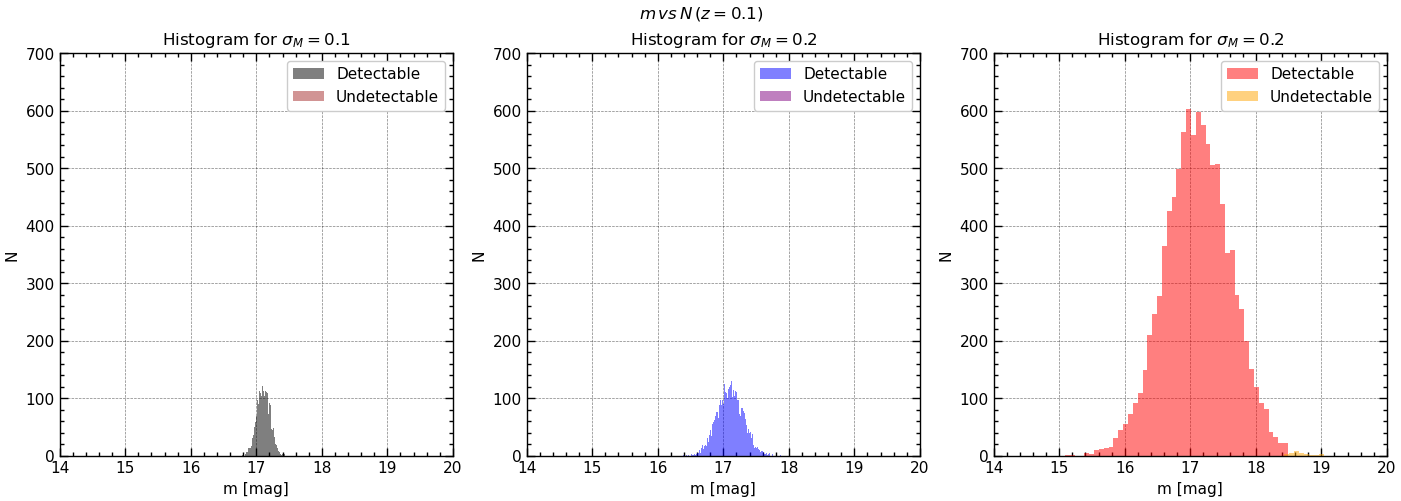

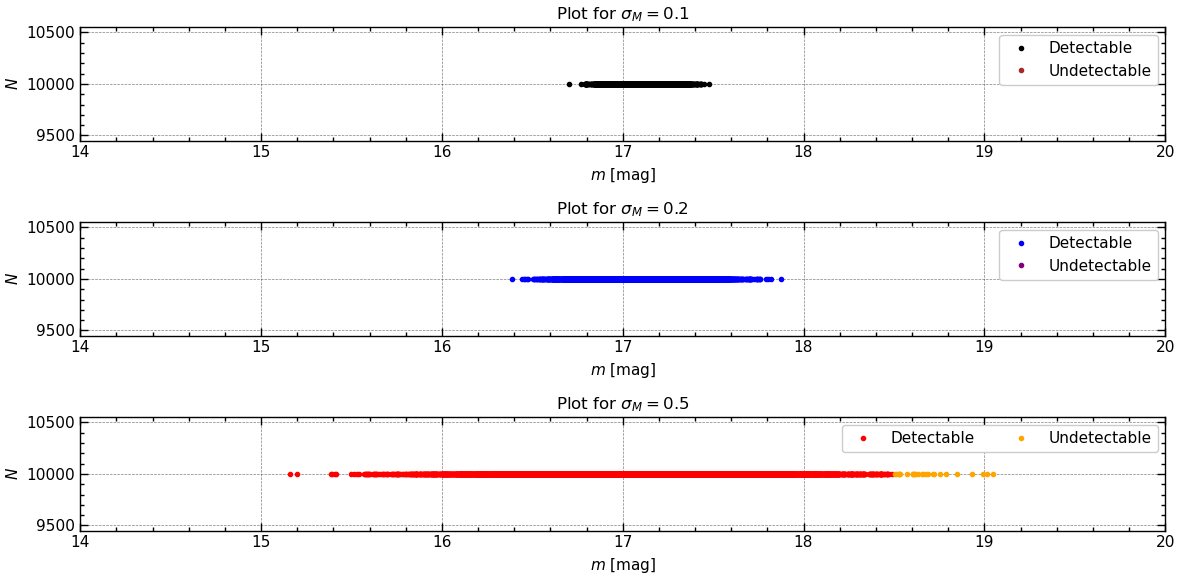

In [16]:
# Density histograms
fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)
# Let's define limits for the plots
x_limits = (14,20)
y_limits = (0,700)

fig.suptitle(r"$m \, vs \, N \, (z=0.1)$")

# First subplot
axes[0].set_title(r"Histogram for $\sigma_M = 0.1$")
count_m_M1_0, bins_m_M1_0, patches_m_M1_0 = axes[0].hist(
    cleaned_m_M1_24, bins=250, alpha=0.5, label= "Detectable", color="k"
)
axes[0].set_xlabel("m [mag]")
axes[0].set_ylabel("N")
count_und_1_0, bins_und_1_0, patches_und_1_0 = axes[0].hist(
    undet_m_M1_24, bins=250, alpha=0.5, label="Undetectable", color="brown"
)
axes[0].legend()
axes[0].set_ylim(*y_limits)
axes[0].set_xlim(*x_limits)

# Second subplot
axes[1].set_title(r"Histogram for $\sigma_M = 0.2$")
count_M2_0, bins_M2_0, patches_M2_0 = axes[1].hist(
    cleaned_m_M2_24, bins=250, alpha=0.5, label="Detectable", color="b"
)
axes[1].set_xlabel("m [mag]")
axes[1].set_ylabel("N")
count_und_2_0, bins_und_2_0, patches_und_2_0 = axes[1].hist(
    undet_m_M2_24, bins=250, alpha=0.5, label="Undetectable", color="purple"
)
axes[1].legend()
axes[1].set_ylim(*y_limits)
axes[1].set_xlim(*x_limits)

# Third subplot
axes[2].set_title(r"Histogram for $\sigma_M = 0.2$")
count_M3_0, bins_M3_0, patches_M3_0 = axes[2].hist(
    cleaned_m_M3_24, bins=250, alpha=0.5, label="Detectable", color="r"
)
axes[2].set_xlabel("m [mag]")
axes[2].set_ylabel("N")
count_und_3_0, bins_und_3_0, patches_und_3_0 = axes[2].hist(
    undet_m_M3_24, bins=250, alpha=0.5, label="Undetectable", color="orange"
)
axes[2].legend()
axes[2].set_ylim(*y_limits)
axes[2].set_xlim(*x_limits)

plt.show()

plt.figure(figsize=(12, 6))
# First subplot
plt.subplot(3, 1, 1)
plt.title(r"Plot for $\sigma_M = 0.1$")
plt.plot(cleaned_m_M1_24, n_array, color="k", label="Detectable", linestyle=" ", marker=".")
plt.plot(undet_m_M1_24, n_array, color="brown", label="Undetectable", linestyle=" ", marker=".")
plt.xlabel(r"$m$ [mag]")
plt.ylabel(r"$N$")
plt.legend(loc="upper right", ncol=1)
plt.xlim(*x_limits)

# Second subplot
plt.subplot(3, 1, 2)
plt.title(r"Plot for $\sigma_M = 0.2$")
plt.plot(cleaned_m_M2_24, n_array, color="b", label="Detectable", linestyle=" ", marker=".")
plt.plot(undet_m_M2_24, n_array, color="purple", label="Undetectable", linestyle=" ", marker=".")
plt.xlabel(r"$m$ [mag]")
plt.ylabel(r"$N$")
plt.legend(loc="upper right", ncol=1)
plt.xlim(*x_limits)

# Third subplot
plt.subplot(3, 1, 3)
plt.title(r"Plot for $\sigma_M = 0.5$")
plt.plot(cleaned_m_M3_24, n_array, color="r", label="Detectable", linestyle=" ", marker=".")
plt.plot(undet_m_M3_24, n_array, color="orange", label="Undetectable", linestyle=" ", marker=".")
plt.xlabel(r"$m$ [mag]")
plt.ylabel(r"$N$")
plt.legend(loc="upper right", ncol=2)
plt.xlim(*x_limits)

plt.tight_layout()
plt.show()
plt.close()


Let's see the **last the element of the redshift array**, e.g, $z=0.1$. <br>
At this redshift, all the distributions already have undetectable objects. 

In [17]:
# Let's apply the threshold
m_th = 18.5 # detection limitation
# Let's take the last element
ith = -1
cleaned_m_M1 = np.where(m_M1[ith]<m_th,m_M1[ith],0)
cleaned_m_M2 = np.where(m_M2[ith]<m_th,m_M2[ith],0)
cleaned_m_M3 = np.where(m_M3[ith]<m_th,m_M3[ith],0)
# Now the undetectable
undet_m_M1 = np.where(m_M1[ith]>m_th,m_M1[ith],0)
undet_m_M2 = np.where(m_M2[ith]>m_th,m_M2[ith],0)
undet_m_M3 = np.where(m_M3[ith]>m_th,m_M3[ith],0)

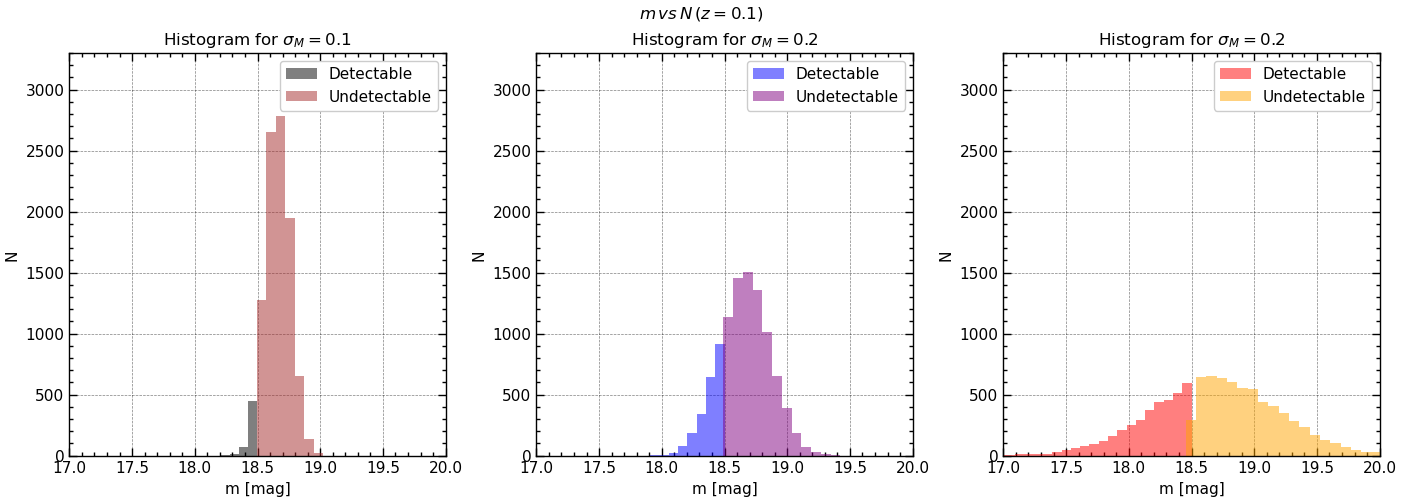

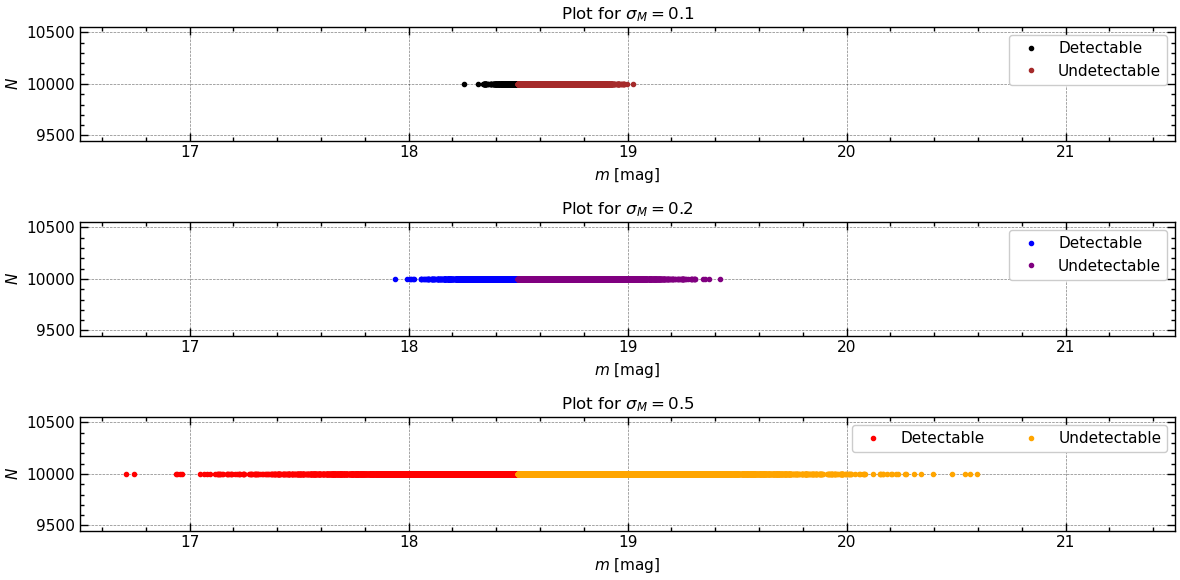

In [18]:
# Density histograms
fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)
fig.suptitle(r"$m \, vs \, N \, (z=0.1)$")

# First subplot
axes[0].set_title(r"Histogram for $\sigma_M = 0.1$")
count_m_M1_0, bins_m_M1_0, patches_m_M1_0 = axes[0].hist(
    cleaned_m_M1, bins=250, alpha=0.5, label= "Detectable", color="k"
)
axes[0].set_xlabel("m [mag]")
axes[0].set_ylabel("N")
count_und_1_0, bins_und_1_0, patches_und_1_0 = axes[0].hist(
    undet_m_M1, bins=250, alpha=0.5, label="Undetectable", color="brown"
)
axes[0].legend()
axes[0].set_ylim(0, 3300)
axes[0].set_xlim(17, 20)

# Second subplot
axes[1].set_title(r"Histogram for $\sigma_M = 0.2$")
count_M2_0, bins_M2_0, patches_M2_0 = axes[1].hist(
    cleaned_m_M2, bins=250, alpha=0.5, label="Detectable", color="b"
)
axes[1].set_xlabel("m [mag]")
axes[1].set_ylabel("N")
count_und_2_0, bins_und_2_0, patches_und_2_0 = axes[1].hist(
    undet_m_M2, bins=250, alpha=0.5, label="Undetectable", color="purple"
)
axes[1].legend()
axes[1].set_ylim(0, 3300)
axes[1].set_xlim(17, 20)

# Third subplot
axes[2].set_title(r"Histogram for $\sigma_M = 0.2$")
count_M3_0, bins_M3_0, patches_M3_0 = axes[2].hist(
    cleaned_m_M3, bins=250, alpha=0.5, label="Detectable", color="r"
)
axes[2].set_xlabel("m [mag]")
axes[2].set_ylabel("N")
count_und_3_0, bins_und_3_0, patches_und_3_0 = axes[2].hist(
    undet_m_M3, bins=250, alpha=0.5, label="Undetectable", color="orange"
)
axes[2].legend()
axes[2].set_ylim(0, 3300)
axes[2].set_xlim(17, 20)

plt.figure(figsize=(12, 6))
# First subplot
plt.subplot(3, 1, 1)
plt.title(r"Plot for $\sigma_M = 0.1$")
plt.plot(cleaned_m_M1, n_array, color="k", label="Detectable", linestyle=" ", marker=".")
plt.plot(undet_m_M1, n_array, color="brown", label="Undetectable", linestyle=" ", marker=".")
plt.xlabel(r"$m$ [mag]")
plt.ylabel(r"$N$")
plt.legend(loc="upper right", ncol=1)
plt.xlim(16.5, 21.5)

# Second subplot
plt.subplot(3, 1, 2)
plt.title(r"Plot for $\sigma_M = 0.2$")
plt.plot(cleaned_m_M2, n_array, color="b", label="Detectable", linestyle=" ", marker=".")
plt.plot(undet_m_M2, n_array, color="purple", label="Undetectable", linestyle=" ", marker=".")
plt.xlabel(r"$m$ [mag]")
plt.ylabel(r"$N$")
plt.legend(loc="upper right", ncol=1)
plt.xlim(16.5, 21.5)

# Third subplot
plt.subplot(3, 1, 3)
plt.title(r"Plot for $\sigma_M = 0.5$")
plt.plot(cleaned_m_M3, n_array, color="r", label="Detectable", linestyle=" ", marker=".")
plt.plot(undet_m_M3, n_array, color="orange", label="Undetectable", linestyle=" ", marker=".")
plt.xlabel(r"$m$ [mag]")
plt.ylabel(r"$N$")
plt.legend(loc="upper right", ncol=2)
plt.xlim(16.5, 21.5)

plt.tight_layout()
plt.show()
plt.close()

plt.show()

(f) Make $3$ plots of $|\Delta M|$ versus $z$, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$.

In [19]:
bias_M1 = bias_calc(m_M1, d_M1)
bias_M2 = bias_calc(m_M2, d_M2)
bias_M3 = bias_calc(m_M3, d_M3)

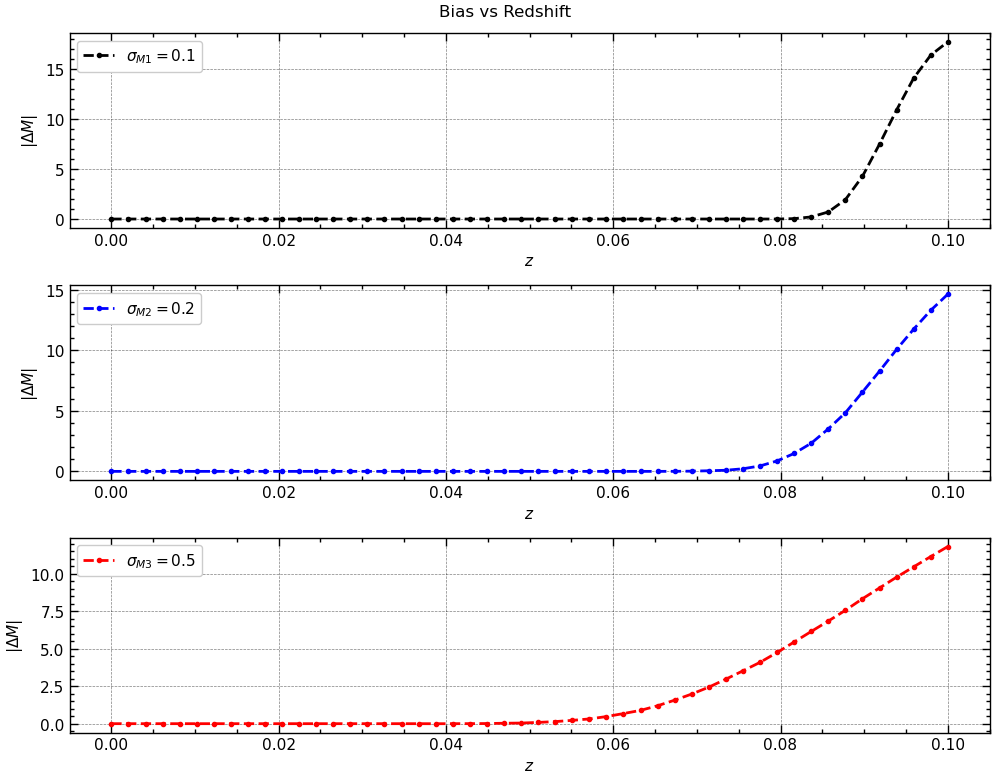

In [20]:
plt.figure(figsize=(10, 8))
plt.suptitle("Bias vs Redshift")

# First subplot
plt.subplot(3, 1, 1)
plt.plot(z_array, bias_M1, color = "k", label = r"$\sigma_{M1}=0.1$", linestyle = "--", marker = ".")
plt.xlabel(r"$z$")
plt.ylabel(r"|$\Delta M$|")
plt.legend()

# Second subplot
plt.subplot(3, 1, 2)
plt.plot(z_array, bias_M2, color = "b", label = r"$\sigma_{M2}=0.2$", linestyle = "--", marker = ".")
plt.xlabel(r"$z$")
plt.ylabel(r"|$\Delta M$|")
plt.legend()

# Third subplot
plt.subplot(3, 1, 3)
plt.plot(z_array, bias_M3, color = "r", label = r"$\sigma_{M3}=0.5$", linestyle = "--", marker = ".")
plt.xlabel(r"$z$")
plt.ylabel(r"|$\Delta M$|")
plt.legend()

plt.tight_layout()
plt.show()
plt.close()


Joining them in one plot

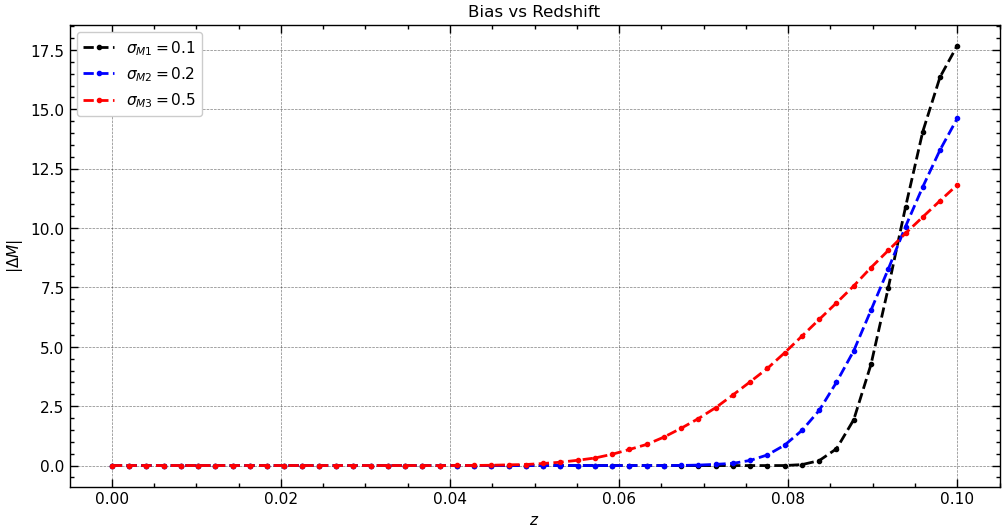

In [21]:
plt.figure(figsize=(12,6))

plt.plot(z_array, bias_M1, color = "k", label = r"$\sigma_{M1}=0.1$", linestyle = "--", marker = ".")
plt.plot(z_array, bias_M2, color = "b", label = r"$\sigma_{M2}=0.2$", linestyle = "--", marker = ".")
plt.plot(z_array, bias_M3, color = "r", label = r"$\sigma_{M3}=0.5$", linestyle = "--", marker = ".")


plt.title("Bias vs Redshift")
plt.xlabel(r"$z$")
plt.ylabel(r"|$\Delta M$|")

plt.legend()
plt.show()
plt.close()

(g) Based on your results, at which redshift does selection bias become important in each case?

Just by observing at the plots, focusing on where the bias takes a non-zero value, we could argue that:
1) For $\sigma_{M1}$  the redshift becomes relevant around $z=0.085$
2) For $\sigma_{M2}$  the redshift becomes relevant around $z=0.075$
3) For $\sigma_{M3}$  the redshift becomes relevant around $z=0.055$

However, we can use derivatives to have a better answer.

In [ ]:
def d_threshold(bias, h, threshold):
    """
    Computes the derivative of the input bias array and returns the index where
    the derivative exceeds the given threshold.
    Input:
        bias (np.array of floats) -> bias array that we want to analyze.
        threshold (float) -> threshold value.
        h (float) -> step size of the z array.
    Output:
        index (int) -> index where the derivative exceeds the threshold. Returns -1 if none.
    Author: R.S.S.G
    Date created: 11/12/2024
    """    
    # Compute the derivative
    dbias = np.gradient(bias, h, axis = 0)
    
    # Find the indices where the derivative exceeds the threshold
    indices = np.where(dbias > threshold)[0]
    # Returns the index or -1 if none
    index = indices[0] if len(indices) > 0 else -1
    return index

In [23]:
# Let's define the spacing
h = z_array[1]-z_array[0]

# Let's define the threshold, where we choose this value as the order of the z spacing (h) is small
dth = 50

#Now calling our function
i_M1 = d_threshold(bias_M1, h, dth)
i_M2 = d_threshold(bias_M2, h, dth)
i_M3 = d_threshold(bias_M3, h, dth)

z_M1 = z_array[i_M1]
z_M2 = z_array[i_M2]
z_M3 = z_array[i_M3]

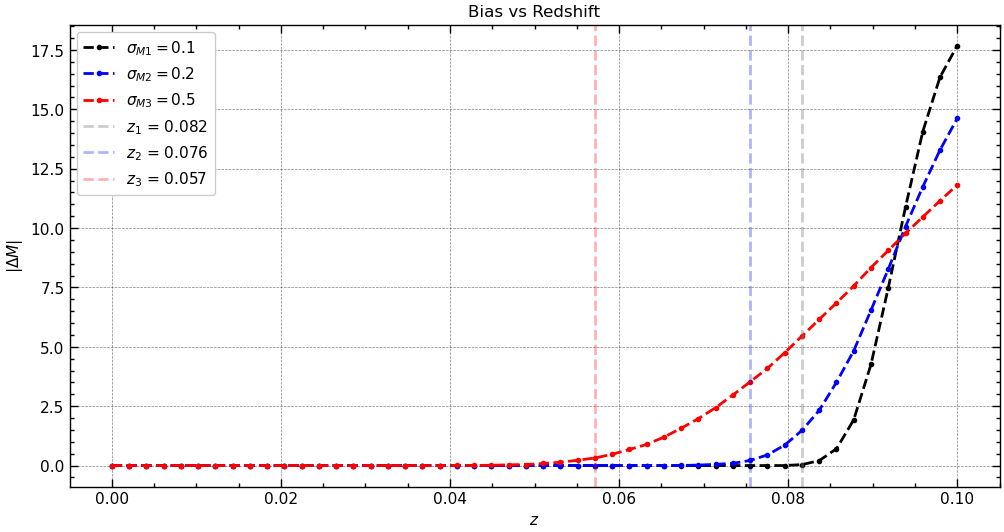

In [24]:
plt.figure(figsize=(12,6))

plt.plot(z_array, bias_M1, color = "k", label = r"$\sigma_{M1}=0.1$", linestyle = "--", marker = ".")
plt.plot(z_array, bias_M2, color = "b", label = r"$\sigma_{M2}=0.2$", linestyle = "--", marker = ".")
plt.plot(z_array, bias_M3, color = "r", label = r"$\sigma_{M3}=0.5$", linestyle = "--", marker = ".")

plt.title("Bias vs Redshift")
plt.xlabel(r"$z$")
plt.ylabel(r"|$\Delta M$|")

plt.axvline(z_M1, linestyle = "--", color = "gray", alpha = 0.4, label = f"$z_1$ = {z_M1:.3f}")
plt.axvline(z_M2, linestyle = "--", color = "blue", alpha = 0.3, label = f"$z_2$ = {z_M2:.3f}")
plt.axvline(z_M3, linestyle = "--", color = "red", alpha = 0.3, label = f"$z_3$ = {z_M3:.3f}")

plt.legend()
plt.show()
plt.close()

However, this method might not be the best option to identify where the bias becomes relevant. As the derivative from each bias array $|\Delta M|$ is different from the others! Notice that they grow at different rates.<br>
Let's just use a threshold to see where the bias stops being zero or near to it.

In [ ]:
def b_threshold(bias, threshold):
    """
    Applies a threshold to the input bias array and returns the index where
    the condition is satisfied for first time.
    Input:
        bias (np.array of floats) -> bias array that we want to analyze.
        threshold (float) -> threshold value.
    Output:
        index (int) -> index where the condition is satisfied. Returns -1 if none.
    Author: R.S.S.G
    Date created: 11/12/2024
    """    
    # Apply the threshold
    indices = np.where(bias > threshold)[0]
    # Returns the index or -1 if none
    index = indices[0] if len(indices) > 0 else -1
    return index

In [26]:
# Let's define the threshold, this time we chose after inspecting the bias arrays
# where we can notice that the difference between the bias values is small until
# the z value we want to find.
bth = 0.2

#Now calling our function
i_M1_alt = b_threshold(bias_M1, bth)
i_M2_alt = b_threshold(bias_M2, bth)
i_M3_alt = b_threshold(bias_M3, bth)

z_M1_alt = z_array[i_M1_alt]
z_M2_alt = z_array[i_M2_alt]
z_M3_alt = z_array[i_M3_alt]

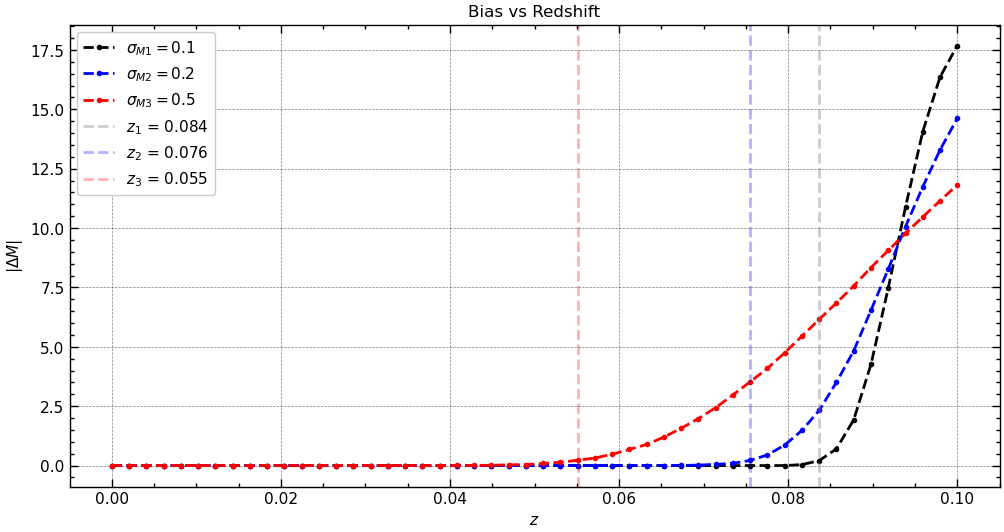

In [27]:
plt.figure(figsize=(12,6))

plt.plot(z_array, bias_M1, color = "k", label = r"$\sigma_{M1}=0.1$", linestyle = "--", marker = ".")
plt.plot(z_array, bias_M2, color = "b", label = r"$\sigma_{M2}=0.2$", linestyle = "--", marker = ".")
plt.plot(z_array, bias_M3, color = "r", label = r"$\sigma_{M3}=0.5$", linestyle = "--", marker = ".")

plt.title("Bias vs Redshift")
plt.xlabel(r"$z$")
plt.ylabel(r"|$\Delta M$|")

plt.axvline(z_M1_alt, linestyle = "--", color = "gray", alpha = 0.4, label = f"$z_1$ = {z_M1_alt:.3f}")
plt.axvline(z_M2_alt, linestyle = "--", color = "b", alpha = 0.3, label = f"$z_2$ = {z_M2_alt:.3f}")
plt.axvline(z_M3_alt, linestyle = "--", color = "r", alpha = 0.3, label = f"$z_3$ = {z_M3_alt:.3f}")

plt.legend()
plt.show()
plt.close()

We conclude that:
1) For $\sigma_{M1}$  the redshift becomes relevant around $z=0.084$
2) For $\sigma_{M2}$  the redshift becomes relevant around $z=0.076$
3) For $\sigma_{M3}$  the redshift becomes relevant around $z=0.055$

Note: I think it's interesting how these three dsitributions have the same bias $|\Delta M|$ at some z around $z=0.91$. And also how they behave after that z. I will think about it in future days.
Thank you.